In [49]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


In [50]:
# Load your startup dataset (replace 'startup_data.csv' with your dataset file)
data = pd.read_csv('success.csv')


In [51]:
data

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [52]:
data.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [53]:
data = data.drop(columns=['age_first_milestone_year', 'age_last_milestone_year','Unnamed: 6','closed_at'])


In [54]:
data.isnull().sum()

Unnamed: 0                0
state_code                0
latitude                  0
longitude                 0
zip_code                  0
id                        0
city                      0
name                      0
labels                    0
founded_at                0
first_funding_at          0
last_funding_at           0
age_first_funding_year    0
age_last_funding_year     0
relationships             0
funding_rounds            0
funding_total_usd         0
milestones                0
state_code.1              1
is_CA                     0
is_NY                     0
is_MA                     0
is_TX                     0
is_otherstate             0
category_code             0
is_software               0
is_web                    0
is_mobile                 0
is_enterprise             0
is_advertising            0
is_gamesvideo             0
is_ecommerce              0
is_biotech                0
is_consulting             0
is_othercategory          0
object_id           

In [55]:
# Generate synthetic data for demonstration
np.random.seed(0)
X = np.random.rand(100, 2)  # Two features for simplicity
y = np.random.choice([0, 1], 100)  # Binary target variable

In [56]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [57]:
# Assuming your DataFrame is named 'data'
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Print the list of categorical columns
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['state_code', 'zip_code', 'id', 'city', 'name', 'founded_at',
       'first_funding_at', 'last_funding_at', 'state_code.1', 'category_code',
       'object_id', 'status'],
      dtype='object')


In [58]:
column_to_keep = 'status'

In [59]:
# Select columns with data type 'object' (strings)
string_columns = data.select_dtypes(include=['object'])


In [60]:
# List of columns to drop (excluding the one to keep)
columns_to_drop = [col for col in string_columns.columns if col != column_to_keep]


In [61]:
# Drop the selected string columns (excluding the one to keep)
data = data.drop(columns_to_drop, axis=1)


In [62]:
data

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,42.358880,-71.056820,1,2.2493,3.0027,3,3,375000,3,...,1,0,1,0,0,0,0,1.0000,0,acquired
1,204,37.238916,-121.973718,1,5.1260,9.9973,9,4,40100000,1,...,0,1,0,0,1,1,1,4.7500,1,acquired
2,1001,32.901049,-117.192656,1,1.0329,1.0329,5,1,2600000,2,...,0,0,0,1,0,0,0,4.0000,1,acquired
3,738,37.320309,-122.050040,1,3.1315,5.3151,5,3,40000000,1,...,0,0,0,0,1,1,1,3.3333,1,acquired
4,1002,37.779281,-122.419236,0,0.0000,1.6685,2,2,1300000,1,...,0,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,37.740594,-122.376471,1,0.5178,0.5178,9,1,1100000,2,...,0,0,0,1,0,0,0,6.0000,1,acquired
919,721,42.504817,-71.195611,0,7.2521,9.2274,1,3,52000000,1,...,1,1,0,0,1,0,0,2.6667,1,closed
920,557,37.408261,-122.015920,0,8.4959,8.4959,5,1,44000000,1,...,0,0,0,0,0,0,1,8.0000,1,closed
921,589,37.556732,-122.288378,1,0.7589,2.8329,12,2,15500000,2,...,0,0,0,1,1,0,0,1.0000,1,acquired


In [63]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['status']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [64]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Standardize features (not necessary for this synthetic data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
# Define the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'MLP Neural Network': MLPClassifier(max_iter=1000)
}

In [67]:
# Train and test each classifier, and print its accuracy for both the training and testing data
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f'{clf_name}:')
    print(f'Training Accuracy: {train_accuracy:.2f}')
    print(f'Testing Accuracy: {test_accuracy:.2f}')
    print()

Logistic Regression:
Training Accuracy: 0.55
Testing Accuracy: 0.50

Gradient Boosting:
Training Accuracy: 1.00
Testing Accuracy: 0.45

Random Forest:
Training Accuracy: 1.00
Testing Accuracy: 0.40

Decision Tree:
Training Accuracy: 1.00
Testing Accuracy: 0.30

MLP Neural Network:
Training Accuracy: 0.59
Testing Accuracy: 0.35



In [68]:
from sklearn.metrics import roc_auc_score

In [69]:
# Initialize and train each model
models = {
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'MLP Neural Network': MLPClassifier(max_iter=1000)
}

In [70]:
# Assuming 'X_train' and 'y_train' contain your training data
for model_name, model in models.items():
    model.fit(X_train, y_train)


In [71]:
# Assuming 'X_test' is your test data
y_true = y_test  # Replace 'y_true' with your actual true labels


In [72]:
# Calculate AUC for each model
auc_values = {model_name: roc_auc_score(y_true, model.predict_proba(X_test)[:, 1]) for model_name, model in models.items()}


In [73]:
# Print AUC values for each model
for model_name, auc in auc_values.items():
    print(f'{model_name} - AUC: {auc:.2f}')

Logistic Regression - AUC: 0.70
Gradient Boosting - AUC: 0.45
Random Forest - AUC: 0.39
Decision Tree - AUC: 0.27
MLP Neural Network - AUC: 0.38


In [74]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'MLP Neural Network': MLPClassifier(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}


In [75]:
trained_models = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[model_name] = model


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [76]:
# 4. Evaluate Models
model_results = {}
for model_name, model in trained_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    model_results[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': report
    }

In [77]:
# 5. Compare Model Performance
for model_name, results in model_results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {results['Accuracy']}")
    print(f"Classification Report:\n{results['Classification Report']}")
    print("=" * 50)

Model: Logistic Regression
Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.38      1.00      0.55         6
           1       1.00      0.29      0.44        14

    accuracy                           0.50        20
   macro avg       0.69      0.64      0.49        20
weighted avg       0.81      0.50      0.47        20

Model: Gradient Boosting
Accuracy: 0.45
Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.50      0.35         6
           1       0.67      0.43      0.52        14

    accuracy                           0.45        20
   macro avg       0.47      0.46      0.44        20
weighted avg       0.55      0.45      0.47        20

Model: MLP Neural Network
Accuracy: 0.3
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.67      0.36         6
           1       0.50      0.14      0.22    

In [78]:
import matplotlib.pyplot as plt

In [79]:
model_names = ['Logistic Regression', 'Gradient Boosting', 'MLP Neural Network', 'Random Forest', 'Decision Tree']
model_accuracies = [0.5, 0.45, 0.3, 0.45, 0.3]  # Accuracy values corresponding to each model


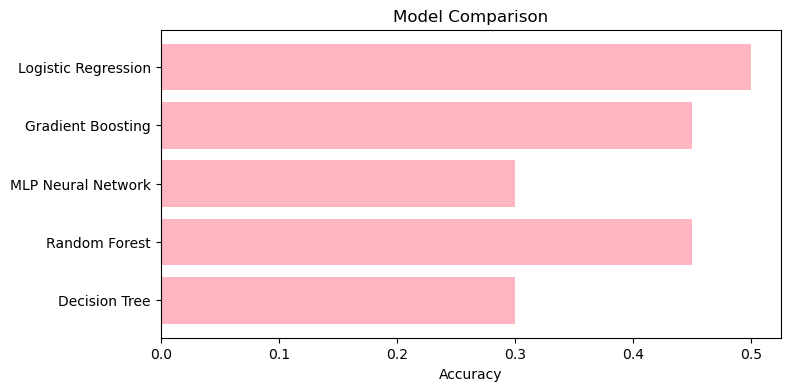

In [80]:
plt.figure(figsize=(8, 4))
plt.barh(model_names, model_accuracies, color='lightpink')
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.gca().invert_yaxis()
plt.show()

In [81]:
import seaborn as sns

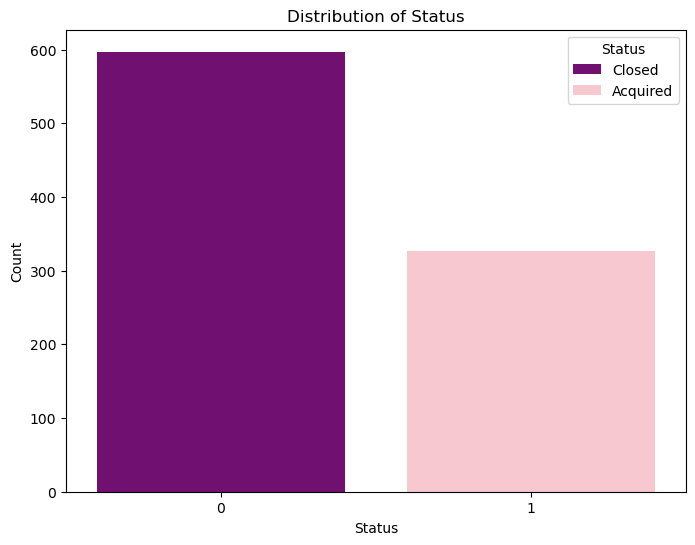

In [82]:
# Define a custom color palette
custom_palette = {'Closed': 'purple', 'Acquired': 'pink'}

# Assuming 'df' is your DataFrame and 'status' is the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='status', hue=data['status'].map({0: 'Closed', 1: 'Acquired'}), dodge=False, 
              palette=custom_palette)

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Status')
plt.legend(title='Status', labels=['Closed', 'Acquired'])
plt.show()